# Lab 3: Selection Problem
## CS 3851 Algorithms
## Amish Verma, Dylan Schultz, Gavin Vaubel, Michael Salgado

## Introduction


## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import math

## 1. Problem Approach


## 2. Psuedocode

## 3. Explanation and Justification for Algorithm

Our algorithm works similar to a regular quick sort with a few changes. Like quick sort with random pivots, a pivot position is selected randomly, and the list is partitioned with less valuable elements to the left and more valuable elements to the right. Where it differs from quick sort is after the list has been partitioned, it checks if the input for k is less than or greater than the pivot index and adjusts the start and end of the list artificially to focus in on a closer section. This is then done recursively until it gets to the point where the pivot after partitioning is equal to k – 1, which accommodates for the 0 based index list.

A few problems with this were the original plan we had was to shrink the list instead of changing the start and end indices, and this caused problems with the index being out of bounds sometimes. Then, when we changed to use start and end, there were problem instances where start would be greater than end and throw an error. The solution to this problem was to swap start and end when this happened, which fixed all issues remaining with the code. Now, given any random list of any random size, it will return the expected index and does not sort the entire list to reach it.

### Implementation

In [2]:
def find_min(k, arr, start, end):
    if len(arr) >= 1:
        if start > end:
            start, end = end, start
        pickRand(arr, start, end)

        pivot = sort_around_pivot(arr[0], arr)
        if pivot == k - 1:
            return arr[pivot]

        if k - 1 < pivot:
            return find_min(k, arr, 0, pivot - 1)

        else:
            return find_min(k, arr, pivot + 1, end - 1)

In [3]:
'''
function chooses a random pivot position and swaps index 0 with it
'''
def pickRand(arr, start, end):
    randomIndex = random.randint(start, end)
    arr[0], arr[randomIndex] = arr[randomIndex], arr[0]
    # print(arr)

    return

In [4]:
'''
function will sort around the pivot position putting elements less than pivot
to the left and elements greater than on the right
code from 
https://www.geeksforgeeks.org/quicksort-using-random-pivoting/
'''


def sort_around_pivot(pivot, arr):
    start = 0
    stop = len(arr) - 1
    pivot = start  # pivot

    # a variable to memorize where the
    i = start + 1

    # partition in the array starts from.
    for j in range(start + 1, stop + 1):

        # if the current element is smaller
        # or equal to pivot, shift it to the
        # left side of the partition.
        if arr[j] <= arr[pivot]:
            arr[i], arr[j] = arr[j], arr[i]
            i = i + 1
    arr[pivot], arr[i - 1] = \
        arr[i - 1], arr[pivot]
    pivot = i - 1
    return pivot

## 4. Test Case Results (where n = 10)

Test case runs can be found in the appendix

| Test Case | Expected Output | Algorithm Output |
| --- | --- | --- |
| Reverse Sorted List (n to 0) finding k = 1 | 0 | 0 |
| Sorted List (0 to n) finding k = 1 | 0 | 0 |
| Random List (n elements) finding k = 1 | 0 | 0 |
| Reverse Sorted List (n to 0) finding k = n/2 | 4 | 4 |
| Sorted List (0 to n) finding k = n/2 | 4 | 4 |
| Random List (n elements) finding k = n/2 | 4 | 4 |
| Reverse Sorted List (n to 0) finding k = n | 9 | 9 |
| Sorted List (0 to n) finding k = n | 9 | 9 |
| Random List (n elements) finding k = n | 9 | 9 |

## 5. Analysis using asymptotic notation

## 6. Solving recurrence relation

## 7. Benchmarking

In [5]:
benchmark_sizes = [10, 100, 1000, 10000, 100000]

In [6]:
def benchmark(arr, k, method):
    if method:
        start_time = time.perf_counter()
        boringWay(arr, k)
        end_time = time.perf_counter()
        return end_time - start_time
    else:
        start_time = time.perf_counter()
        find_min(k, arr, 0, len(arr) - 1)
        end_time = time.perf_counter()
        return end_time - start_time

### Creating benchmark lists

In [7]:
def create_reverse(n):
    arr = []
    index = 0
    for x in range(n-1, -1, -1):
        arr.insert(index, x)
        index += 1
    return arr

def create_sorted(n):
    arr = []
    for x in range(0, n):
        arr.append(x)
    return arr

def create_random(n):
    arr = random.sample(range(0, n), n)
    return arr

### Benchmarking reverse sorted lists

In [8]:
reverse_k_last_times = []
reverse_k_mid_times = []
reverse_k_first_times = []

for size in benchmark_sizes:
    rev_list = create_reverse(size)
    
    k_last_time = benchmark(rev_list, len(rev_list), False)
    reverse_k_last_times.append(k_last_time)
    
    k_mid_time = benchmark(rev_list, int(len(rev_list)/2), False)
    reverse_k_mid_times.append(k_mid_time)

    k_first_time = benchmark(rev_list, 1, False)
    reverse_k_first_times.append(k_first_time)

[5.5625103414058685e-05, 0.0009489757940173149, 0.002800227142870426, 0.03741265460848808, 0.2291191490367055]
[4.505272954702377e-05, 7.944926619529724e-05, 0.002539614215493202, 0.05216500349342823, 0.6799194263294339]
[3.709271550178528e-05, 5.4195523262023926e-05, 0.0004519158974289894, 0.004158694297075272, 0.07386924047023058]


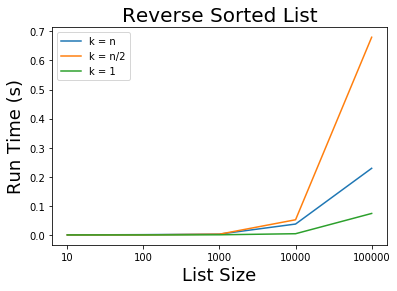

In [9]:
default_x_ticks = range(len(benchmark_sizes))
plt.plot(default_x_ticks, reverse_k_last_times, label="k = n")
plt.plot(default_x_ticks, reverse_k_mid_times, label="k = n/2")
plt.plot(default_x_ticks, reverse_k_first_times, label="k = 1")
plt.xticks(default_x_ticks, benchmark_sizes)

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Reverse Sorted List", fontsize=20)
plt.legend()

print(reverse_k_last_times)
print(reverse_k_mid_times)
print(reverse_k_first_times)

### Benchmarking sorted lists

In [10]:
sorted_k_last_times = []
sorted_k_mid_times = []
sorted_k_first_times = []

for size in benchmark_sizes:
    rev_list = create_sorted(size)
    
    k_last_time = benchmark(rev_list, len(rev_list), False)
    sorted_k_last_times.append(k_last_time)
    
    k_mid_time = benchmark(rev_list, int(len(rev_list)/2), False)
    sorted_k_mid_times.append(k_mid_time)

    k_first_time = benchmark(rev_list, 1, False)
    sorted_k_first_times.append(k_first_time)

[1.6461126506328583e-05, 0.00022418517619371414, 0.006902381777763367, 0.05671084392815828, 0.2988506807014346]
[1.0920688509941101e-05, 0.00023573916405439377, 0.0036371424794197083, 0.03326281160116196, 1.0438894219696522]
[4.002824425697327e-06, 6.204098463058472e-05, 0.0005011390894651413, 0.005317394621670246, 0.09813107550144196]


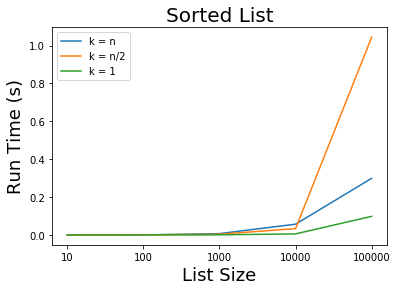

In [11]:
default_x_ticks = range(len(benchmark_sizes))
plt.plot(default_x_ticks, sorted_k_last_times, label="k = n")
plt.plot(default_x_ticks, sorted_k_mid_times, label="k = n/2")
plt.plot(default_x_ticks, sorted_k_first_times, label="k = 1")
plt.xticks(default_x_ticks, benchmark_sizes)

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Sorted List", fontsize=20)
plt.legend()

print(sorted_k_last_times)
print(sorted_k_mid_times)
print(sorted_k_first_times)

### Benchmarking random lists

In [12]:
random_k_last_times = []
random_k_mid_times = []
random_k_first_times = []

for size in benchmark_sizes:
    rev_list = create_random(size)
    
    k_last_time = benchmark(rev_list, len(rev_list), False)
    random_k_last_times.append(k_last_time)
    
    k_mid_time = benchmark(rev_list, int(len(rev_list)/2), False)
    random_k_mid_times.append(k_mid_time)

    k_first_time = benchmark(rev_list, 1, False)
    random_k_first_times.append(k_first_time)

[2.0128674805164337e-05, 0.00016700569540262222, 0.00102296844124794, 0.019425027072429657, 0.37871404830366373]
[1.7721205949783325e-05, 9.55658033490181e-05, 0.002228471450507641, 0.043844196014106274, 1.508104600943625]
[1.152046024799347e-05, 0.00011646188795566559, 0.00048214104026556015, 0.004935812205076218, 0.0529730012640357]


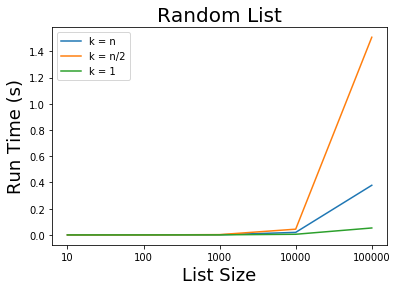

In [13]:
default_x_ticks = range(len(benchmark_sizes))
plt.plot(default_x_ticks, random_k_last_times, label="k = n")
plt.plot(default_x_ticks, random_k_mid_times, label="k = n/2")
plt.plot(default_x_ticks, random_k_first_times, label="k = 1")
plt.xticks(default_x_ticks, benchmark_sizes)

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Random List", fontsize=20)
plt.legend()

print(random_k_last_times)
print(random_k_mid_times)
print(random_k_first_times)

In [14]:
print(random_k_mid_times)

[1.7721205949783325e-05, 9.55658033490181e-05, 0.002228471450507641, 0.043844196014106274, 1.508104600943625]


### Benchmarking Quicksort

In [15]:
def boringWay(arr, k):
    quick_sort(arr, 0, len(arr) - 1)
    # print(arr)
    return arr[k - 1]

def quick_sort(array, low, high):
    if low < high:
 
        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition(array, low, high)

        # Recursive call on the left of pivot
        return quick_sort(array, low, pi - 1)

        # Recursive call on the right of pivot
        return quick_sort(array, pi + 1, high)
        
def partition(array, low, high):
 
  # Choose the rightmost element as pivot
    pivot = array[high]
 
    # Pointer for greater element
    i = low - 1

    # Traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:
          # If element smaller than pivot is found
          # swap it with the greater element pointed by i
            i = i + 1

          # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])

        # Swap the pivot element with the greater element specified by i
        (array[i + 1], array[high]) = (array[high], array[i + 1])

    # Return the position from where partition is done
    return i + 1

In [16]:
quick_random_k_last_times = []
quick_random_k_mid_times = []
quick_random_k_first_times = []

for size in benchmark_sizes:
    rev_list = create_random(size)
    
    k_last_time = benchmark(rev_list, len(rev_list), True)
    quick_random_k_last_times.append(k_last_time)
    
    k_mid_time = benchmark(rev_list, int(len(rev_list)/2), True)
    quick_random_k_mid_times.append(k_mid_time)

    k_first_time = benchmark(rev_list, 1, False)
    quick_random_k_first_times.append(k_first_time)

[7.754191756248474e-06, 2.356152981519699e-05, 0.000627296045422554, 0.0077174948528409, 0.05153436679393053]
[8.0866739153862e-06, 0.00010454561561346054, 0.0020000627264380455, 0.022257030941545963, 0.2912059584632516]
[2.0291656255722046e-05, 2.308003604412079e-05, 0.0004566274583339691, 0.00598579365760088, 0.08971527498215437]


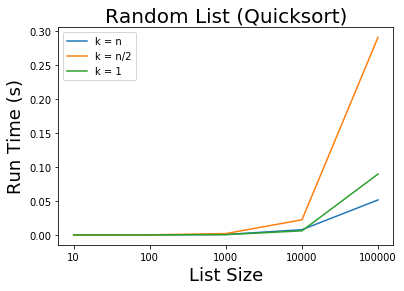

In [17]:
default_x_ticks = range(len(benchmark_sizes))
plt.plot(default_x_ticks, quick_random_k_last_times, label="k = n")
plt.plot(default_x_ticks, quick_random_k_mid_times, label="k = n/2")
plt.plot(default_x_ticks, quick_random_k_first_times, label="k = 1")
plt.xticks(default_x_ticks, benchmark_sizes)

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Random List (Quicksort)", fontsize=20)
plt.legend()

print(quick_random_k_last_times)
print(quick_random_k_mid_times)
print(quick_random_k_first_times)

| Test Case | Runtime (List size: 10) | Runtime (List size: 100) | Runtime (List size: 1,000) | Runtime (List size: 10,000) | Runtime (List size: 100,000) |
| --- | --- | --- | --- | --- | --- |
| Reverse Sorted List (n to 0) finding k = 1 | 5.56e-06 | 9.49e-04 | 0.00280 | 0.0374 | 0.229 |
| Sorted List (0 to n) finding k = 1 | 4.50e-05 | 7.945e-05 | 0.00253 | 0.0522 | 0.679 |
| Random List (n elements) finding k = 1 | 3.709e-05 | 5.42e-05 | 4.52e-04 | 0.00416 | 0.0739 |
| Reverse Sorted List (n to 0) finding k = n/2 | 1.646e-05 | 2.24e-04 | 0.0069 | 0.0567 | 0.299 |
| Sorted List (0 to n) finding k = n/2 | 1.09e-05 | 2.36e-04 | 0.00363 | 0.0333 | 1.044 |
| Random List (n elements) finding k = n/2 | 4.003e-06 | 6.20e-05 | 5.01e-04 | 0.0053 | 0.0981 |
| Reverse Sorted List (n to 0) finding k = n | 2.01e-05 | 1.67e-4 | 0.001 | 0.0194 | 0.379 |
| Sorted List (0 to n) finding k = n | 1.77e-05 | 9.557e-05 | 0.0022 | 0.0438 | 1.508 |
| Random List (n elements) finding k = n | 1.152e-05 | 1.16e-04 | 4.82e-03 | 0.0049 | 0.053 |

## 7. Appendix

### Test Cases

#### Reverse Sorted List (n to 0) finding k = 1

In [18]:
reverse_list = create_reverse(10)
kth_smallest = find_min(1, reverse_list, 0, len(reverse_list) - 1)
print(f"kth smallest elment: {kth_smallest}")

kth smallest elment: 0


#### Sorted List (0 to n) finding k = 1

In [19]:
sorted_list = create_sorted(10)
kth_smallest = find_min(1, sorted_list, 0, len(sorted_list) - 1)
print(f"kth smallest elment: {kth_smallest}")

kth smallest elment: 0


#### Random List (n elements) finding k = 1

In [20]:
random_list = create_random(10)
kth_smallest = find_min(1, random_list, 0, len(random_list) - 1)
print(f"kth smallest elment: {kth_smallest}")

kth smallest elment: 0


#### Reverse Sorted List (n to 0) finding k = n/2

In [21]:
reverse_list = create_reverse(10)
kth_smallest = find_min(int(len(sorted_list)/2), reverse_list, 0, len(reverse_list) - 1)
print(f"kth smallest elment: {kth_smallest}")

kth smallest elment: 4


#### Sorted List (0 to n) finding k = n/2

In [22]:
sorted_list = create_sorted(10)
kth_smallest = find_min(int(len(sorted_list)/2), sorted_list, 0, len(sorted_list) - 1)
print(f"kth smallest elment: {kth_smallest}")

kth smallest elment: 4


#### Random List (n elements) finding k = n/2

In [23]:
random_list = create_random(10)
kth_smallest = find_min(int(len(random_list)/2), random_list, 0, len(random_list) - 1)
print(f"kth smallest elment: {kth_smallest}")

kth smallest elment: 4


#### Reverse Sorted List (n to 0) finding k = n

In [24]:
reverse_list = create_reverse(10)
kth_smallest = find_min(len(reverse_list), reverse_list, 0, len(reverse_list) - 1)
print(f"kth smallest elment: {kth_smallest}")

kth smallest elment: 9


#### Sorted List (0 to n) finding k = n

In [25]:
sorted_list = create_sorted(10)
kth_smallest = find_min(len(sorted_list), sorted_list, 0, len(sorted_list) - 1)
print(f"kth smallest elment: {kth_smallest}")

kth smallest elment: 9


#### Random List (n elements) finding k = n

In [26]:
random_list = create_random(10)
kth_smallest = find_min(len(random_list), random_list, 0, len(random_list) - 1)
print(f"kth smallest elment: {kth_smallest}")

kth smallest elment: 9


## Conclusion